# Model 1
# About Dataset
## Context : Predict behavior to retain customers.( Churn Or Not)
## Content : 
Each row represents a customer, each column contains customer’s attributes , The data set includes information about:

- Customers who left within the last month – the column is called Churn 
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

## Metadata:
   - customerID:Customer ID
   - gender:Whether the customer is a male or a female
   - SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
   - Partner: Whether the customer has a partner or not (Yes, No)
   - Dependents: Whether the customer has dependents or not (Yes, No)
   - tenure:Number of months the customer has stayed with the company
   - PhoneService:Whether the customer has a phone service or not (Yes, No)
   - MultipleLines:Whether the customer has multiple lines or not (Yes, No, No phone service)
   - InternetService:Customer’s internet service provider (DSL, Fiber optic, No)
   - OnlineSecurity:Whether the customer has online security or not (Yes, No, No internet service)
   - OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
   - DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
   - TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
   - StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
   - StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
   - Contract: The contract term of the customer (Month-to-month, One year, Two year)
   - PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
   - PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
   - MonthlyCharges: The amount charged to the customer monthly
   - TotalCharges : The total amount charged to the customer
   
   - Churn: Whether the customer churned or not (Yes or No)**Label**
   
## Requirements

**1- Load data and Detemine features are categorical ( nominal, ordinal, ratio, or interval based ). (data Path =`WA_Fn-UseC_-Telco-Customer-Churn.csv`)**

**2-  How many churned clients are not use internet services**

**3- Based on your observations from First requirement :**

   - Check Structural Errors in data and Handle it
   - Check outlier in continuous Features 
   - Check Missing values and Handle it

**4- Extract The Most important feature based on Mutual information**

**5- Use DecisionTreeClassifier to predict customer churned and show why your model can decide customer churn**

#### Hint: 
- you can consider any empty string as missing values
- you are free to apply any method to address any necessary data transformations and cleaning procedures

In [46]:
### imports ####
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import mutual_info_classif,f_classif,SelectKBest 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree

In [47]:
data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [48]:
disc_cols=data.select_dtypes(include=["int64"]).columns
disc_cols

Index(['SeniorCitizen', 'tenure'], dtype='object')

In [49]:
cont_cols=data.select_dtypes(include=["float64"]).columns
cont_cols

Index(['MonthlyCharges'], dtype='object')

In [50]:
object_cols=data.select_dtypes("object").columns
object_cols

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [52]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [53]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [54]:
data.describe(include=["O"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [55]:
# Nomial:category features that have 0,1
cat_as_num=data.nunique()[data.nunique()<3]
category_features=list(set(object_cols.append(cat_as_num.index)))
print(category_features)

['StreamingMovies', 'OnlineSecurity', 'DeviceProtection', 'InternetService', 'TotalCharges', 'PaperlessBilling', 'OnlineBackup', 'gender', 'Partner', 'customerID', 'Contract', 'SeniorCitizen', 'Churn', 'StreamingTV', 'TechSupport', 'PaymentMethod', 'Dependents', 'MultipleLines', 'PhoneService']


<AxesSubplot:xlabel='Churn'>

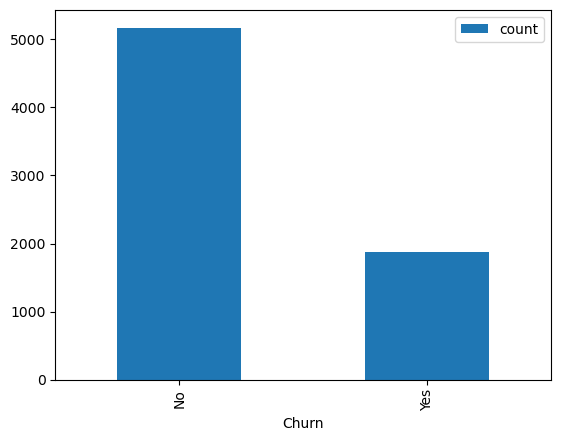

In [56]:
data["Churn"].value_counts().plot(kind="bar",legend=True)

<AxesSubplot:xlabel='gender,Churn'>

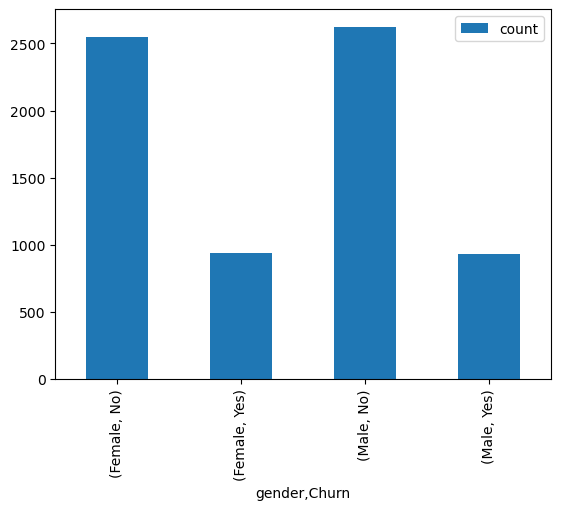

In [57]:
data.groupby(["gender"])["Churn"].value_counts().plot(kind="bar",legend=True)

In [58]:
data["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [59]:
data["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [60]:
data.isna().mean()

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

<AxesSubplot:ylabel='count'>

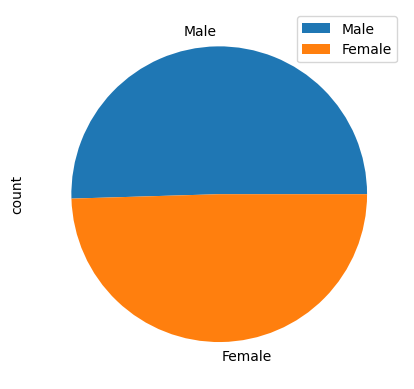

In [61]:
data["gender"].value_counts().plot(kind="pie",legend=True)

In [62]:
# fill the null values 

# Load your dataset into a pandas dataframe
df = data

# Fill null values in numeric columns with the median of the column
numeric_cols = df.select_dtypes("number").columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill null values in object columns with the mode of the column
object_cols = df.select_dtypes(include=['object']).columns
df[object_cols] = df[object_cols].fillna(df[object_cols].mode())


In [63]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [64]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [65]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [66]:
data.select_dtypes(include=["float64"]).columns

Index(['MonthlyCharges'], dtype='object')

the lower limit is -46.02499999999999 and the upper limit 171.375


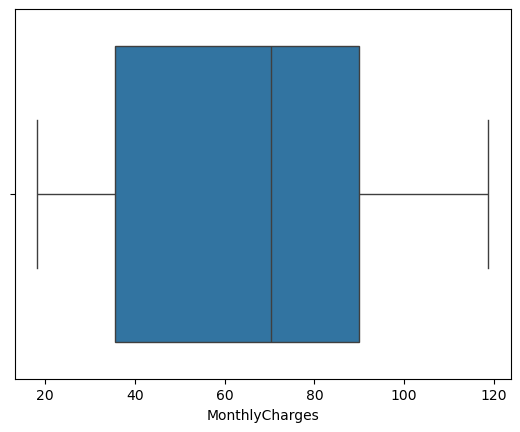

In [67]:
sns.boxplot(x=data["MonthlyCharges"])
print(f"the lower limit is {low_lim} and the upper limit {up_lim}")


In [68]:
# handel the outlier

outlier =[]
q1,q3 = data["MonthlyCharges"].quantile([0.25,0.75])  

IqR = q3 - q1
low_lim = q1 - 1.5 * IqR
up_lim = q3 + 1.5 * IqR
for x in data["MonthlyCharges"]: 
    if ((x> up_lim) or (x<low_lim)): 
         outlier.append(x)
len(outlier)

0

In [69]:
print(f"value of Q1 is {q1},value of Q3 is {q3}")
print(f"low_limit={low_lim:0.2f}  and  upper_limit={up_lim:0.2f}")

value of Q1 is 35.5,value of Q3 is 89.85
low_limit=-46.02  and  upper_limit=171.38


In [70]:
from sklearn.feature_selection import mutual_info_classif

mic=SelectKBest(score_func=mutual_info_classif,k=3)
mic.fit(data.drop(columns="Churn").select_dtypes("number").fillna(0),data["Churn"])
Features_MI_score=pd.Series(mic.scores_,index=data.drop(columns="Churn").select_dtypes("number").fillna(0).columns)
Features_MI_score

G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


SeniorCitizen     0.015349
tenure            0.083829
MonthlyCharges    0.044132
dtype: float64

In [71]:
dummies=pd.get_dummies(data,dtype=int)
dummies

,SeniorCitizen,tenure,MonthlyCharges,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_No,Churn_Yes
0,0,1,29.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,34,56.95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2,53.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,45,42.30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,2,70.70,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7039,0,72,103.20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7040,0,11,29.60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7041,1,4,74.40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [72]:
dummies.dtypes

SeniorCitizen              int64
tenure                     int64
MonthlyCharges           float64
customerID_0002-ORFBO      int32
customerID_0003-MKNFE      int32
                          ...   
TotalCharges_999.45        int32
TotalCharges_999.8         int32
TotalCharges_999.9         int32
Churn_No                   int32
Churn_Yes                  int32
Length: 13620, dtype: object

In [73]:
dummies.select_dtypes("float64")

,MonthlyCharges
0,29.85
1,56.95
2,53.85
3,42.30
4,70.70
...,...
7038,84.80
7039,103.20
7040,29.60
7041,74.40


In [74]:
data.select_dtypes("number").columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [75]:
data.select_dtypes(include=["float64"]).columns

Index(['MonthlyCharges'], dtype='object')

In [76]:
x=dummies.drop(columns="Churn_No")
y=dummies["Churn_No"]

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [78]:
# create tree
model = tree.DecisionTreeClassifier(max_depth=4,random_state=42)

#fit model
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)

print("the accuracy is --->",accuracy*100)

G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


the accuracy is ---> 100.0


In [79]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_13618 <= 0.50
|   |--- class: 1
|--- feature_13618 >  0.50
|   |--- class: 0



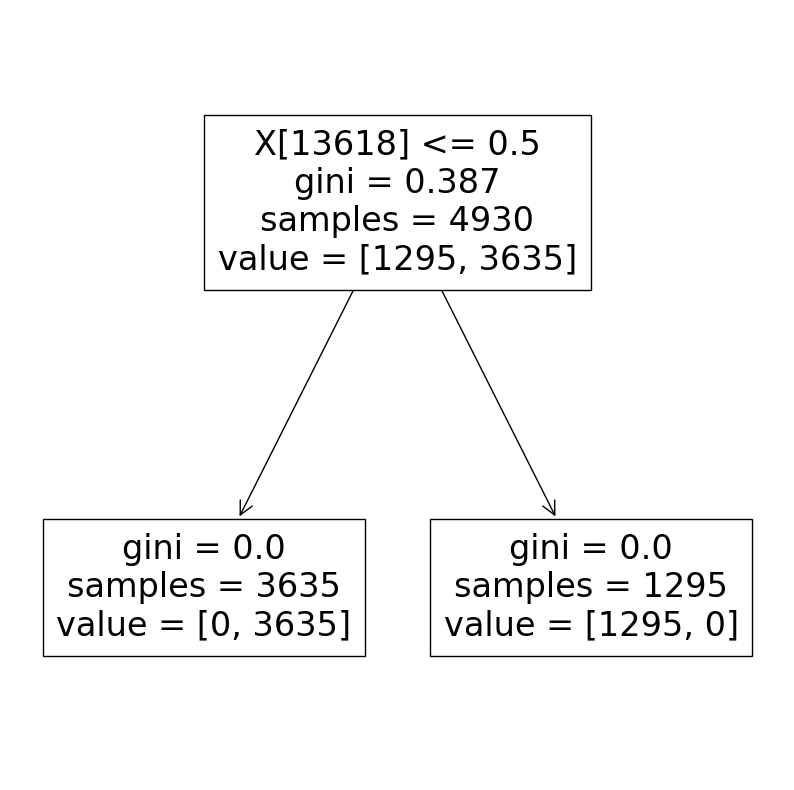

In [80]:
plt.figure(figsize=(10,10))
tree.plot_tree(model,max_depth=4)
plt.show()